Öğrenci Adı: İrem Doğancı
Öğrenci No : 171220031
Veri Seti: CarCrash - train-new.csv
Görev: Hayatta Kalma tahmini (0:Hayır, 1:Evet)

In [1]:
#Kütüphaneler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer

In [2]:
df = pd.read_csv("train-new.csv")

In [3]:
df.head(10)

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,caseid,injSeverity
0,55+,53.342,dead,airbag,belted,1,f,48,2002,1997,deploy,driver,1,45:150:1,3
1,25-39,154.960,alive,none,none,1,m,26,2001,1968,unavail,driver,0,76:40:1,3
2,55+,38.994,alive,none,none,1,f,51,2002,1994,unavail,driver,0,11:184:1,3
3,25-39,168.568,alive,airbag,belted,1,m,27,1998,1996,deploy,pass,1,9:17:1,3
4,10-24,27.751,alive,airbag,belted,0,m,26,2002,1997,nodeploy,pass,0,2:2:2,0
5,10-24,720.453,alive,airbag,belted,1,m,47,1998,1997,nodeploy,driver,0,11:32:1,0
6,10-24,1.000,alive,airbag,belted,1,m,17,2002,1991,deploy,driver,1,50:3:1,2
7,40-54,20.862,alive,none,none,1,m,39,2001,1994,unavail,driver,0,73:95:1,3
8,10-24,115.576,alive,none,belted,1,f,74,2002,1987,unavail,driver,0,78:107:1,3
9,25-39,33.640,alive,none,belted,1,f,31,1999,1991,unavail,pass,0,3:108:2,1


In [4]:
df.shape

(17565, 15)

In [5]:
df.dtypes

dvcat           object
weight         float64
dead            object
airbag          object
seatbelt        object
frontal          int64
sex             object
ageOFocc         int64
yearacc          int64
yearVeh          int64
abcat           object
occRole         object
deploy           int64
caseid          object
injSeverity      int64
dtype: object

In [6]:
df.describe()

,weight,frontal,ageOFocc,yearacc,yearVeh,deploy,injSeverity
count,17565.000000,17565.000000,17565.000000,17565.000000,17565.000000,17565.000000,17565.000000
mean,458.763017,0.643439,37.212411,1999.558497,1992.843894,0.340165,1.713066
std,1471.148421,0.478997,17.945232,1.702162,5.568838,0.473778,1.290565
min,0.000000,0.000000,16.000000,1997.000000,1953.000000,0.000000,0.000000
25%,32.264000,0.000000,22.000000,1998.000000,1989.000000,0.000000,1.000000
50%,86.986000,1.000000,33.000000,2000.000000,1994.000000,0.000000,2.000000
75%,357.283000,1.000000,48.000000,2001.000000,1997.000000,1.000000,3.000000
max,57871.595000,1.000000,97.000000,2002.000000,2003.000000,1.000000,6.000000


In [7]:
df.isnull().sum()

dvcat          0
weight         0
dead           0
airbag         0
seatbelt       0
frontal        0
sex            0
ageOFocc       0
yearacc        0
yearVeh        0
abcat          0
occRole        0
deploy         0
caseid         0
injSeverity    0
dtype: int64

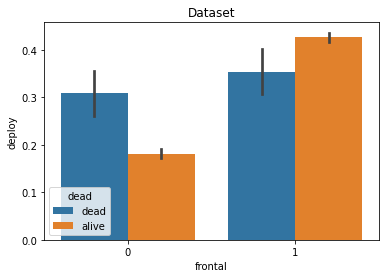

In [8]:
sns.barplot(x="frontal", y="deploy", hue="dead", data=df).set_title("Dataset");

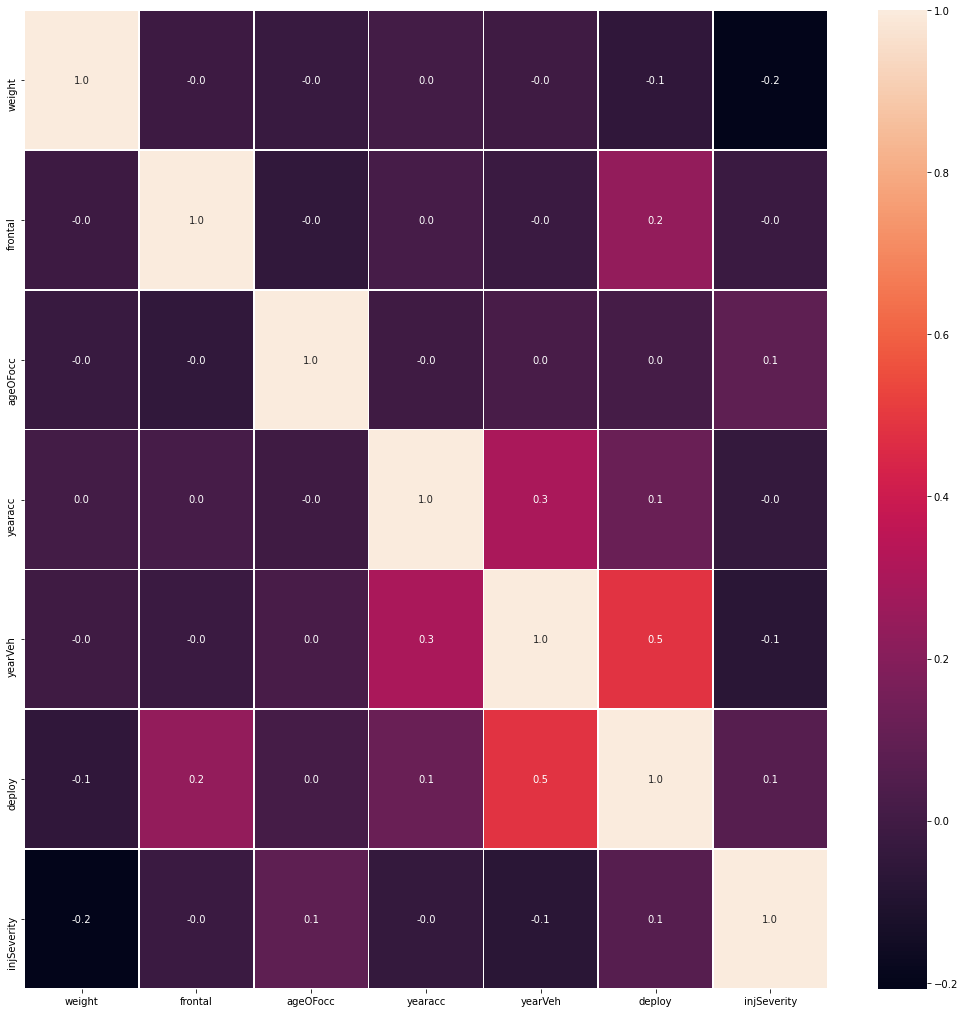

In [9]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [10]:
#Kullanmayacağımız nitelikler
df = df.drop(["weight","ageOFocc","abcat","caseid","injSeverity","yearacc","yearVeh"], axis=1)

In [11]:
df.head(10)

,dvcat,dead,airbag,seatbelt,frontal,sex,occRole,deploy
0,55+,dead,airbag,belted,1,f,driver,1
1,25-39,alive,none,none,1,m,driver,0
2,55+,alive,none,none,1,f,driver,0
3,25-39,alive,airbag,belted,1,m,pass,1
4,10-24,alive,airbag,belted,0,m,pass,0
5,10-24,alive,airbag,belted,1,m,driver,0
6,10-24,alive,airbag,belted,1,m,driver,1
7,40-54,alive,none,none,1,m,driver,0
8,10-24,alive,none,belted,1,f,driver,0
9,25-39,alive,none,belted,1,f,pass,0


In [12]:
df = pd.get_dummies(df,drop_first=True,columns=["dead","airbag","seatbelt","sex","occRole"])
df.head()

,dvcat,frontal,deploy,dead_dead,airbag_none,seatbelt_none,sex_m,occRole_pass
0,55+,1,1,1,0,0,0,0
1,25-39,1,0,0,1,1,1,0
2,55+,1,0,0,1,1,0,0
3,25-39,1,1,0,0,0,1,1
4,10-24,0,0,0,0,0,1,1


In [13]:
X = df.drop(['dead_dead'], axis=1)

y = df['dead_dead']

In [14]:
#Veri seti %70 train, %30 test olarak bölmek
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [15]:
import category_encoders as ce

In [16]:
encoder = ce.OneHotEncoder(cols=['dvcat'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

C:\Users\MRE\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [17]:
X_train.head()

,dvcat_1,dvcat_2,dvcat_3,dvcat_4,dvcat_5,frontal,deploy,airbag_none,seatbelt_none,sex_m,occRole_pass
8188,1,0,0,0,0,1,0,1,0,0,0
15219,1,0,0,0,0,1,0,0,1,1,0
7831,1,0,0,0,0,1,0,1,0,0,0
245,1,0,0,0,0,0,1,0,1,0,0
14480,0,1,0,0,0,1,0,1,0,0,0


In [18]:
#Naive Bayes modeli
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)

GaussianNB()

In [19]:
y_pred = gnb.predict(X_test)

y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=uint8)

In [20]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8731


In [21]:
y_pred_train = gnb.predict(X_train)

y_pred_train

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [22]:
print('Egitim dogruluk puani: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Egitim dogruluk puani: 0.8756


In [23]:
import pickle
with open('Crash_Naive.pkl', 'wb') as f:
        pickle.dump(gnb, f)

In [24]:
#Karar Ağacı modeli
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score


tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_train)

print("Egitim Dataset Dogrulugu: ", accuracy_score(y_train,y_pred))

print("Sonuç Ortalama Dogrulugu: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Egitim Dataset Dogrulugu:  0.957543716958113
Sonuç Ortalama Dogrulugu:  0.954209028060187


<AxesSubplot:xlabel='Maks_Derinlik', ylabel='Degerler'>

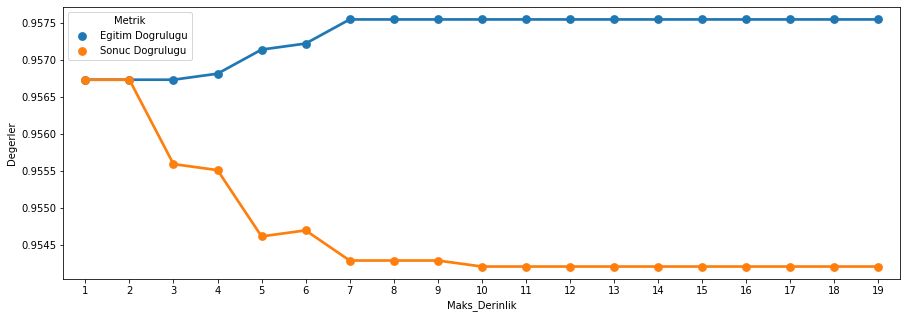

In [25]:
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
tree_depths = []

for depth in range(1,20):
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(X_train,y_train)
    y_training_pred = tree_clf.predict(X_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    tree_depths.append(depth)
    

Tuning_Max_depth = {"Egitim Dogrulugu": training_accuracy, "Sonuc Dogrulugu": val_accuracy, "Maks_Derinlik": tree_depths }
Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)

plot_df = Tuning_Max_depth_df.melt('Maks_Derinlik',var_name='Metrik',value_name="Degerler")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Maks_Derinlik", y="Degerler",hue="Metrik", data=plot_df,ax=ax)

<AxesSubplot:xlabel='Min_Yaprak', ylabel='Degerler'>

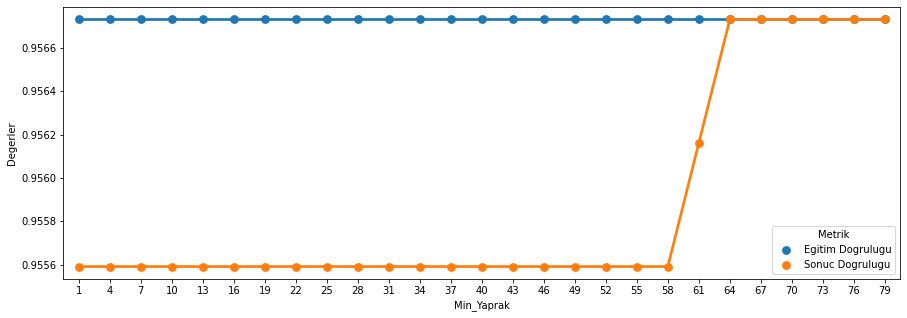

In [26]:
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
min_samples_leaf = []
import numpy as np
for samples_leaf in range(1,80,3): ### Sweeping from 1% samples to 10% samples per leaf 
    tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf = samples_leaf)
    tree_clf.fit(X_train,y_train)
    y_training_pred = tree_clf.predict(X_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    min_samples_leaf.append(samples_leaf)
    

Tuning_min_samples_leaf = {"Egitim Dogrulugu": training_accuracy, "Sonuc Dogrulugu": val_accuracy, "Min_Yaprak": min_samples_leaf }
Tuning_min_samples_leaf_df = pd.DataFrame.from_dict(Tuning_min_samples_leaf)

plot_df = Tuning_min_samples_leaf_df.melt('Min_Yaprak',var_name='Metrik',value_name="Degerler")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Min_Yaprak", y="Degerler",hue="Metrik", data=plot_df,ax=ax)

In [39]:
from sklearn.metrics import confusion_matrix
tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf = 58)
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_test)
print("Test Dogrulugu: ",accuracy_score(y_test,y_pred))
print("Confusion Matrix:")
pd.crosstab(y_test, y_pred, rownames=['Gercek'], colnames=['Tahmin'], margins=True)

Test Dogrulugu:  0.9535104364326376
Confusion Matrix:


Tahmin,0,All
Gercek,,
0,5025,5025
1,245,245
All,5270,5270


In [28]:

with open('Crash_KararAgaci.pkl', 'wb') as f:
        pickle.dump(tree_clf, f)

In [29]:
#KNN modeli
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    train_accuracy[i] = knn.score(X_train, y_train)
    
    test_accuracy[i] = knn.score(X_test, y_test) 

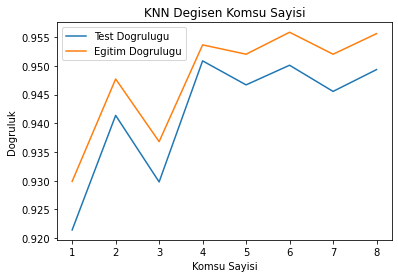

In [30]:
plt.title('KNN Degisen Komsu Sayisi')
plt.plot(neighbors, test_accuracy, label='Test Dogrulugu')
plt.plot(neighbors, train_accuracy, label='Egitim Dogrulugu')
plt.legend()
plt.xlabel('Komsu Sayisi')
plt.ylabel('Dogruluk')
plt.show()

In [31]:
knn = KNeighborsClassifier(n_neighbors=6)

In [32]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [33]:
print("Egitim Dogrulugu: ",knn.score( X_train,y_train))
print("Test Dogrulugu: ",knn.score(X_test,y_test))

Egitim Dogrulugu:  0.9558357055713704
Test Dogrulugu:  0.9500948766603415


In [34]:
y_pred = knn.predict(X_test)

In [35]:
confusion_matrix(y_test,y_pred)

array([[5001,   24],
       [ 239,    6]], dtype=int64)

In [36]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,5001,24,5025
1,239,6,245
All,5240,30,5270


In [37]:
with open('Crash_KNN.pkl', 'wb') as f:
        pickle.dump(knn, f)